In [1]:
pip install pandas numpy matplotlib statsmodels scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [61]:
import os
import pandas as pd

# Directory with the CSV files
data_dir = '/Users/wenjing/Downloads/Capstone/filtered_combined_decay_score_with_returns/'

# Function to load all CSV files in the directory and replace NA values with 0
def load_data_with_na_handling(data_dir):
    data = {}
    for file in os.listdir(data_dir):
        if file.endswith(".csv"):
            stock_symbol = file.split('.')[0]
            file_path = os.path.join(data_dir, file)
            df = pd.read_csv(file_path)
            
            # Replace all NA values with 0
            df.fillna(0, inplace=True)
            
            data[stock_symbol] = df
    return data

# Load the data
data = load_data_with_na_handling(data_dir)

# Verify if any NA values exist
for stock_symbol, df in data.items():
    print(f"{stock_symbol} has {df.isna().sum().sum()} NA values.")


BA has 0 NA values.
MRK has 0 NA values.
INTC has 0 NA values.
MSFT has 0 NA values.
AMD has 0 NA values.
NVDA has 0 NA values.
TSLA has 0 NA values.
GOOG has 0 NA values.
AAPL has 0 NA values.


In [58]:
# Assuming your DataFrame is called df
data_goog = data['GOOG']
columns_to_keep = ["Date", "open", "close", "volume", "Stock_symbol", 
                   "combined_sentiment_score", "weighted_sentiment_score", 
                   "adjusted_sentiment_score", "return"]

data_goog = data_goog[columns_to_keep]
data_goog

,Date,open,close,volume,Stock_symbol,combined_sentiment_score,weighted_sentiment_score,adjusted_sentiment_score,return
0,7/6/20,74.002998,74.785004,31280000,GOOG,1.0,0.873060,0.688855,0.010567
1,7/7/20,74.500000,74.259003,29164000,GOOG,1.0,0.898035,0.757383,-0.003235
2,7/8/20,74.716003,74.800003,24994000,GOOG,-1.0,-0.540512,0.096479,0.001124
3,7/9/20,75.322502,75.549500,28466000,GOOG,1.0,1.107780,0.593899,0.003014
4,7/10/20,75.307503,77.086998,37126000,GOOG,-3.0,-2.306744,-0.649478,0.023630
...,...,...,...,...,...,...,...,...,...
865,12/11/23,133.820007,134.699997,24502900,GOOG,8.0,6.115604,4.522424,0.006576
866,12/12/23,133.270004,133.639999,26584000,GOOG,9.0,6.852411,5.824328,0.002776
867,12/13/23,134.544998,133.970001,25414500,GOOG,3.0,2.069114,4.084778,-0.004274
868,12/14/23,134.770004,133.199997,29619100,GOOG,0.0,0.000000,2.302418,-0.011650


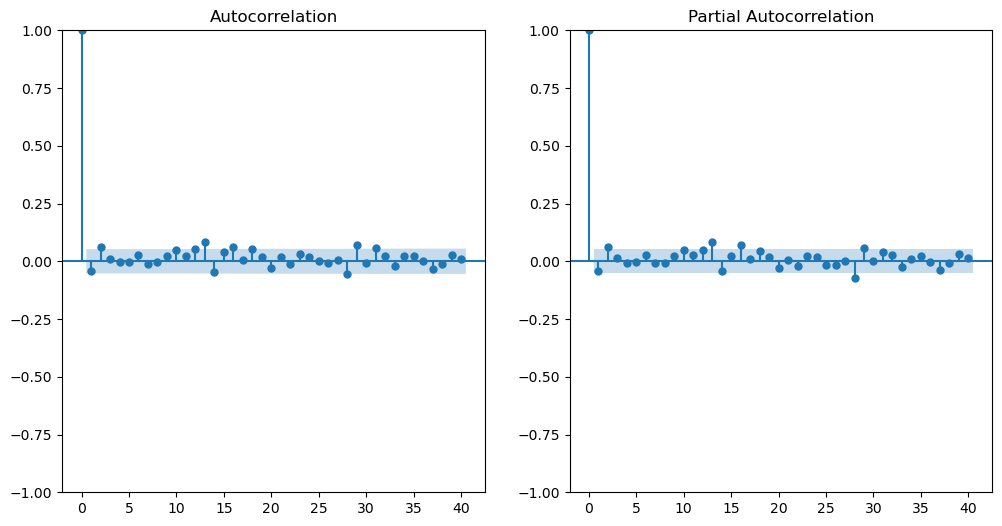

In [3]:
def plot_acf_pacf(df, lags=40):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    plot_acf(df['return'], lags=lags, ax=axes[0])
    plot_pacf(df['return'], lags=lags, ax=axes[1])
    plt.show()

# Example for one stock symbol (replace with actual iteration over stocks)
stock_symbol = list(data.keys())[0]
df = data[stock_symbol]

# Plot ACF and PACF
plot_acf_pacf(df)


In [59]:
data = {}
data['GOOG'] = data_goog

Evaluating GOOG...


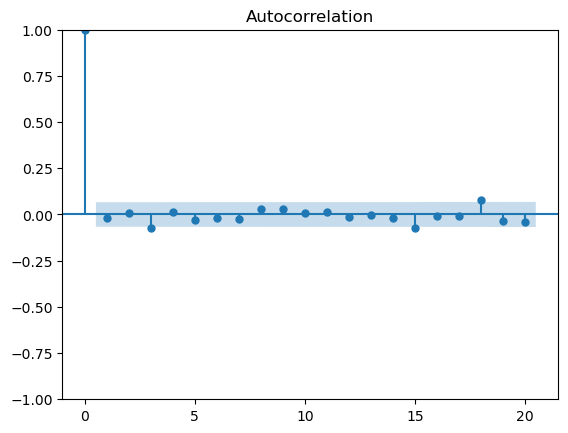

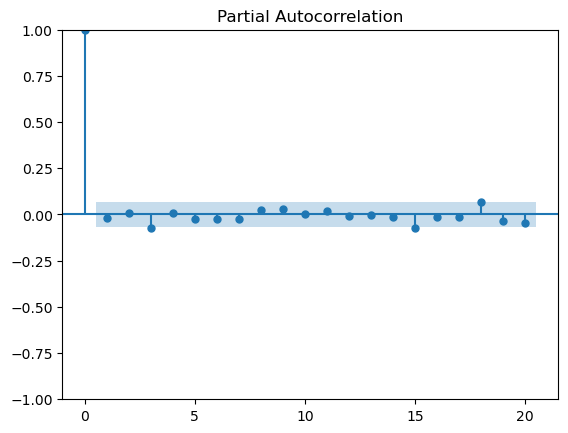

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/m

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/m

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA 

/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimi

Best Experiment RMSE: 0.012577122796740647 with parameters (5, 1, 5)
Best Control RMSE: 0.012837880621989907 with parameters (5, 0, 6)
  stock_symbol  experiment_rmse  control_rmse best_params_experiment  \
0         GOOG         0.012577      0.012838              (5, 1, 5)   

  best_params_control  
0           (5, 0, 6)  


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Split the data into training and testing sets (80/20 split)
def split_time_series_data(df, train_size=0.8):
    train_index = int(len(df) * train_size)
    train = df[:train_index]
    test = df[train_index:]
    return train, test

# SARIMAX Experiment: Using open, volume, and weighted_sentiment_score to predict return
def sarimax_experiment(df, p, d, q):
    train, test = split_time_series_data(df)  # Split data
    
    # Prepare training and test sets
    X_train = train[['open', 'volume', 'weighted_sentiment_score']]
    y_train = train['return']
    X_test = test[['open', 'volume', 'weighted_sentiment_score']]
    y_test = test['return']
    
    # Train SARIMAX model
    model = SARIMAX(y_train, exog=X_train, order=(p, d, q))
    results = model.fit(disp=False, method='powell')
    
    # Make predictions
    predictions = results.predict(start=len(train), end=len(train) + len(test) - 1, exog=X_test)
    
    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test, predictions))
    return rmse, results

# SARIMAX Control: Using open and volume to predict return
def sarimax_control(df, p, d, q):
    train, test = split_time_series_data(df)  # Split data
    
    # Prepare training and test sets
    X_train = train[['open', 'volume']]
    y_train = train['return']
    X_test = test[['open', 'volume']]
    y_test = test['return']
    
    # Train SARIMAX model
    model = SARIMAX(y_train, exog=X_train, order=(p, d, q))
    results = model.fit(disp=False)
    
    # Make predictions
    predictions = results.predict(start=len(train), end=len(train) + len(test) - 1, exog=X_test)
    
    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test, predictions))
    return rmse, results

# Function to evaluate different SARIMAX models for each stock
def evaluate_models(data, max_lag=6, max_d=2):
    results = []

    for stock_symbol, df in data.items():
        print(f"Evaluating {stock_symbol}...")
        
        # Draw ACF and PACF plots to help choose p, q (you can modify this for automatic selection)
        plot_acf(df['return'], lags=20)
        plot_pacf(df['return'], lags=20)
        plt.show()

        best_rmse_exp = float('inf')
        best_rmse_ctrl = float('inf')
        best_params_exp = None
        best_params_ctrl = None
        
        # Try different p, d, q combinations
        for p in range(1, max_lag + 1):
            for q in range(1, max_lag + 1):
                for d in range(0, max_d + 1):
                    # Experiment with weighted_sentiment_score
                    rmse_exp, _ = sarimax_experiment(df, p, d, q)
                    if rmse_exp < best_rmse_exp:
                        best_rmse_exp = rmse_exp
                        best_params_exp = (p, d, q)

                    # Control without weighted_sentiment_score
                    rmse_ctrl, _ = sarimax_control(df, p, d, q)
                    if rmse_ctrl < best_rmse_ctrl:
                        best_rmse_ctrl = rmse_ctrl
                        best_params_ctrl = (p, d, q)
        
        # Store the results
        results.append({
            "stock_symbol": stock_symbol,
            "experiment_rmse": best_rmse_exp,
            "control_rmse": best_rmse_ctrl,
            "best_params_experiment": best_params_exp,
            "best_params_control": best_params_ctrl
        })
        
        print(f"Best Experiment RMSE: {best_rmse_exp} with parameters {best_params_exp}")
        print(f"Best Control RMSE: {best_rmse_ctrl} with parameters {best_params_ctrl}")
    
    # Convert the results list into a DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

evaluation_results = evaluate_models(data)

# Export the results to a CSV file
evaluation_results.to_csv('/Users/wenjing/Downloads/Capstone/evaluation_results2.csv', index=False)

# Print the final evaluation results
print(evaluation_results)


In [65]:
import pandas as pd

# Path to the CSV file
file_path = "/Users/wenjing/Downloads/Capstone/evaluation_results1.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Rename the columns as specified
df.rename(columns={
    'stock_symbol': 'Stock',
    'experiment_rmse': 'Experiment RMSE',
    'control_rmse': 'Control RMSE',
    'best_params_experiment': 'Best Params Experiment',
    'best_params_control': 'Best Params Control'
}, inplace=True)

# Format the 'Experiment RMSE' and 'Control RMSE' columns to keep only 4 digits after the decimal
df['Experiment RMSE'] = df['Experiment RMSE'].round(5)
df['Control RMSE'] = df['Control RMSE'].round(5)

# Print the DataFrame
df


,Stock,Experiment RMSE,Control RMSE,Best Params Experiment,Best Params Control
0,BA,0.01531,0.01554,"(3, 2, 4)","(1, 0, 6)"
1,MRK,0.01073,0.01079,"(1, 0, 2)","(2, 0, 3)"
2,INTC,0.02136,0.02194,"(1, 1, 2)","(1, 0, 6)"
3,MSFT,0.01211,0.01252,"(2, 0, 2)","(4, 0, 4)"
4,AMD,0.02558,0.02649,"(3, 2, 5)","(2, 0, 2)"
5,NVDA,0.02283,0.02275,"(5, 2, 4)","(6, 0, 6)"
6,TSLA,0.02398,0.02495,"(5, 0, 4)","(3, 0, 4)"
7,GOOG,0.01258,0.01284,"(5, 1, 5)","(5, 0, 6)"
8,AAPL,0.01091,0.01021,"(6, 0, 6)","(3, 0, 5)"


In [34]:
data_appl

,Date,open,close,volume,Stock_symbol,combined_sentiment_score,weighted_sentiment_score,adjusted_sentiment_score,return
0,2022-06-03,146.899994,145.380005,88570300.0,AAPL,-9.0,-8.633226,-8.633226,-0.010347
1,2022-06-06,147.029999,146.139999,71598400.0,AAPL,3.0,1.474340,-0.369538,-0.006053
2,2022-06-07,144.350006,148.710007,67808200.0,AAPL,-2.0,-2.362827,-1.513879,0.030204
3,2022-06-08,148.580002,147.960007,53950200.0,AAPL,-3.0,-3.925914,-2.686765,-0.004173
4,2022-06-09,147.080002,142.639999,69473000.0,AAPL,-7.0,-6.614949,-4.434701,-0.030188
...,...,...,...,...,...,...,...,...,...
382,2023-12-11,193.110001,193.179993,60943700.0,AAPL,5.0,2.728097,2.281373,0.000362
383,2023-12-12,193.080002,194.710007,52696900.0,AAPL,6.0,5.239897,4.004743,0.008442
384,2023-12-13,195.089996,197.960007,70404200.0,AAPL,5.0,3.705634,3.911574,0.014711
385,2023-12-14,198.020004,198.110001,66831600.0,AAPL,3.0,2.712940,3.391131,0.000454


Evaluating BA with Best Params: (p=3, d=2, q=4)


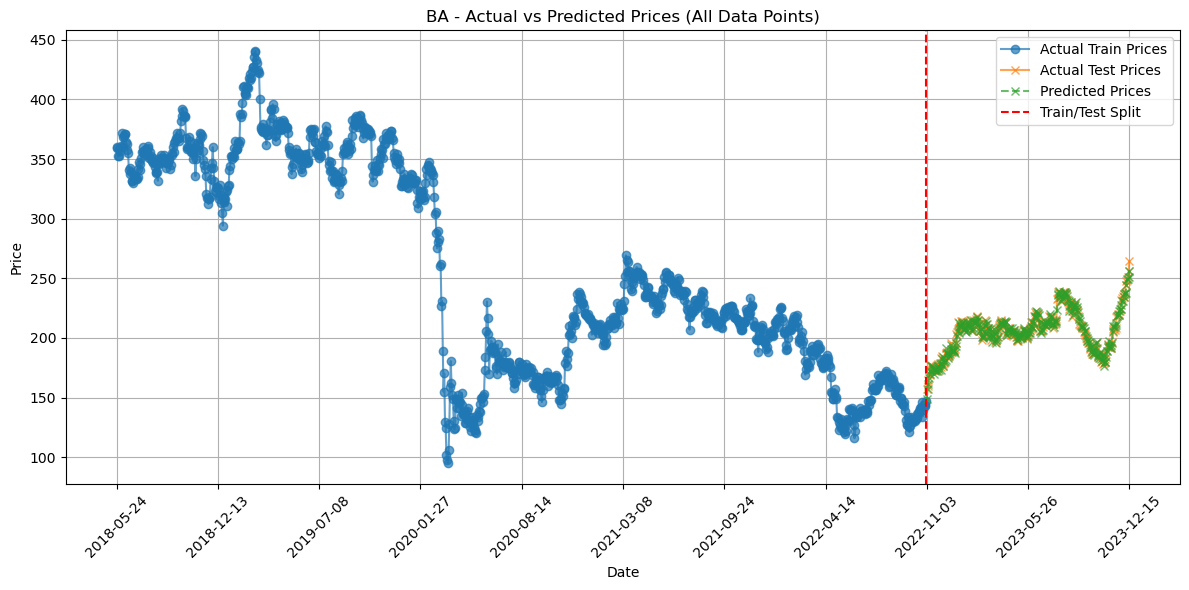

Evaluating MRK with Best Params: (p=1, d=0, q=2)


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


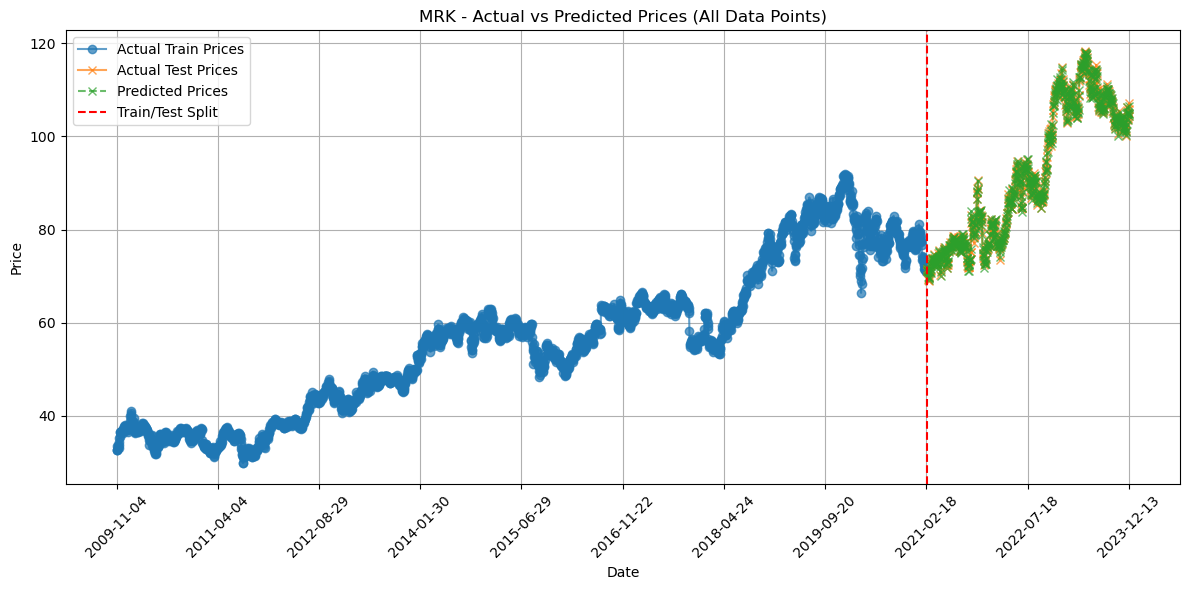

Evaluating INTC with Best Params: (p=1, d=1, q=2)


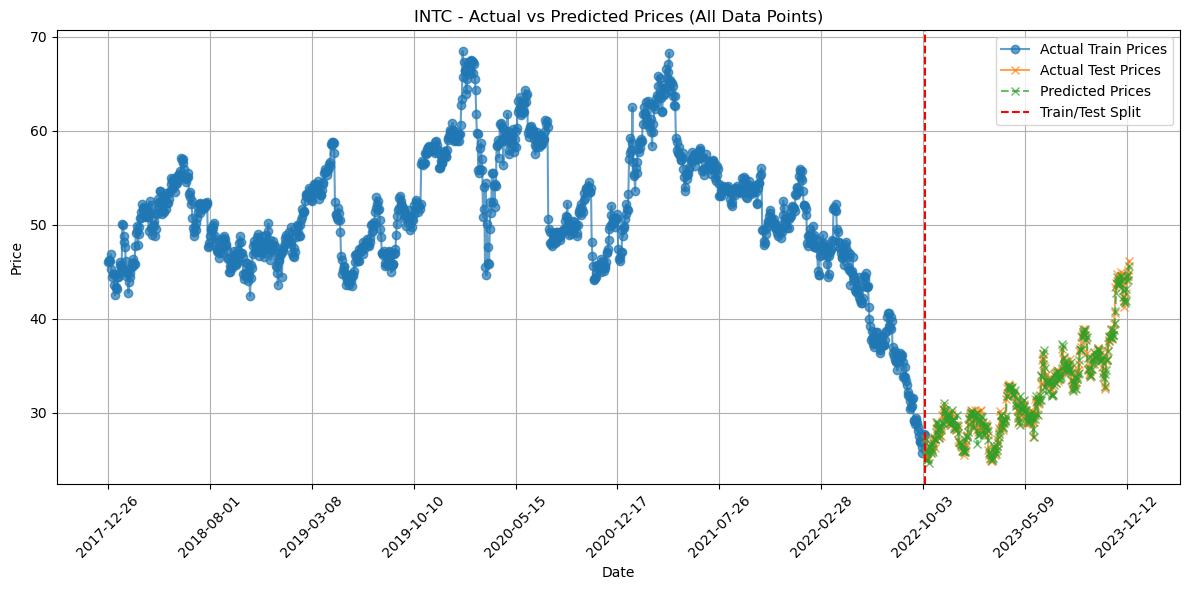

Evaluating MSFT with Best Params: (p=2, d=0, q=2)


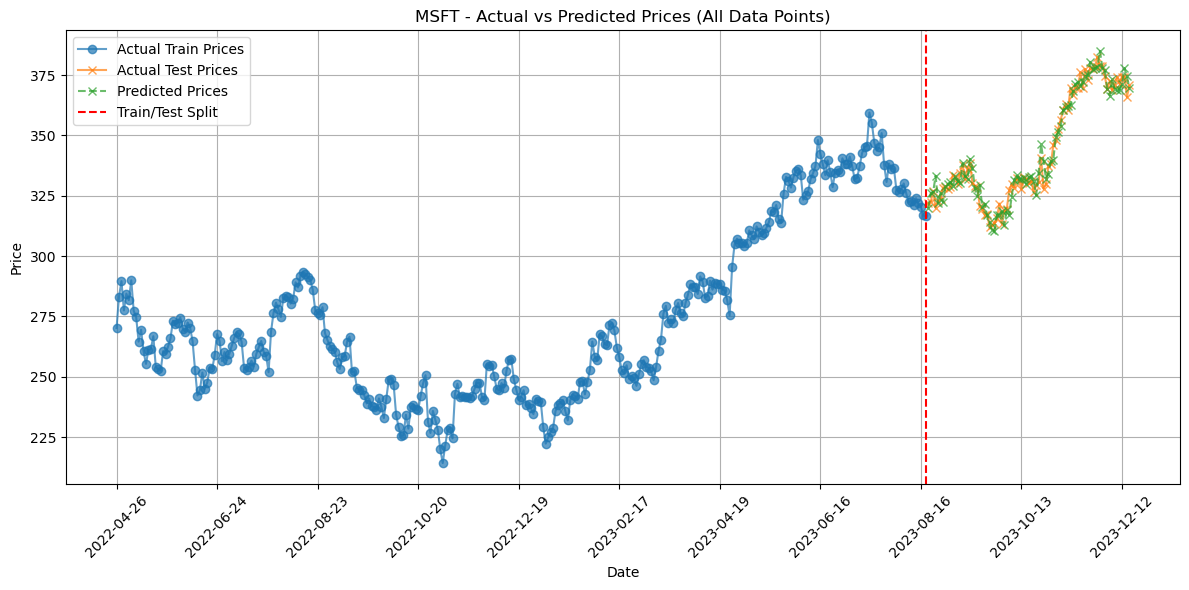

Evaluating AMD with Best Params: (p=3, d=2, q=5)


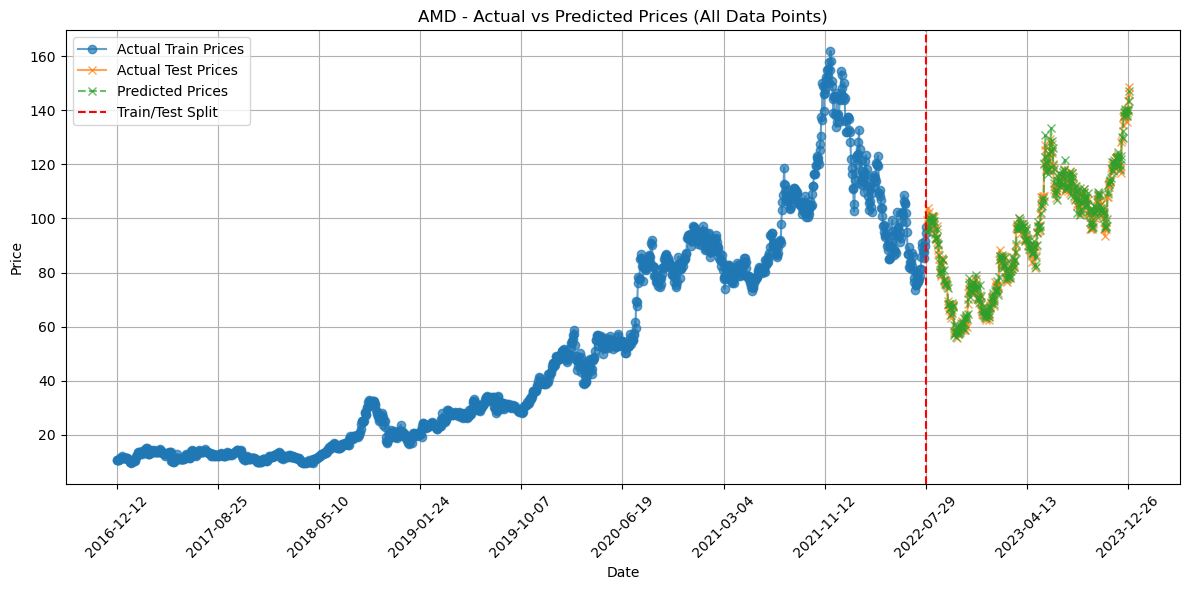

Evaluating NVDA with Best Params: (p=5, d=2, q=4)


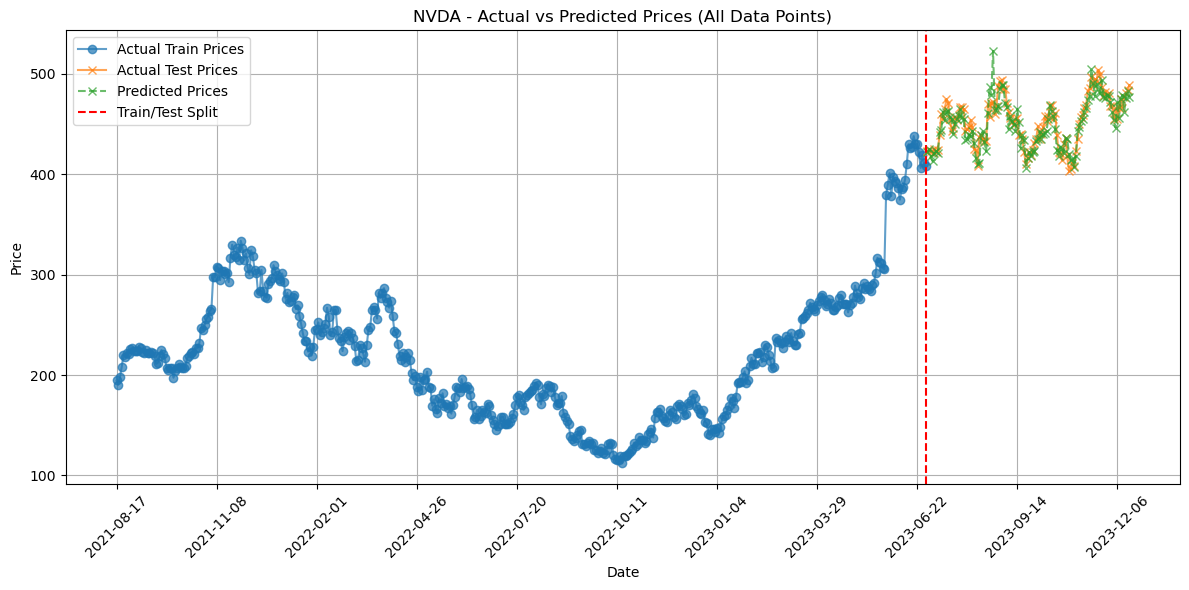

Evaluating TSLA with Best Params: (p=5, d=0, q=4)


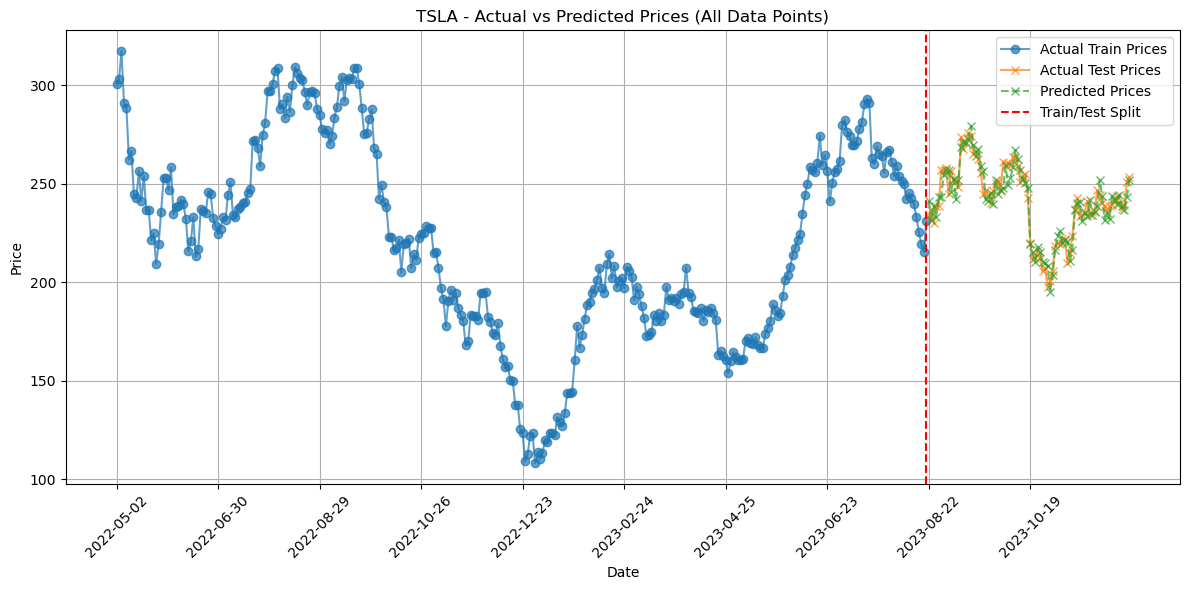

Evaluating GOOG with Best Params: (p=5, d=1, q=5)


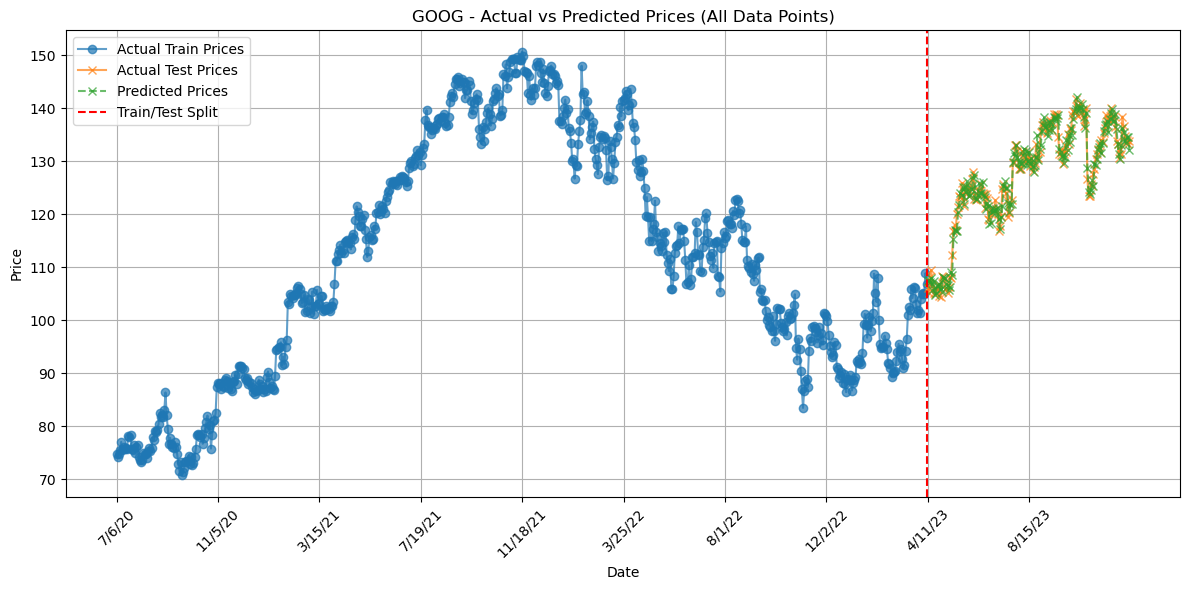

Evaluating AAPL with Best Params: (p=6, d=0, q=6)


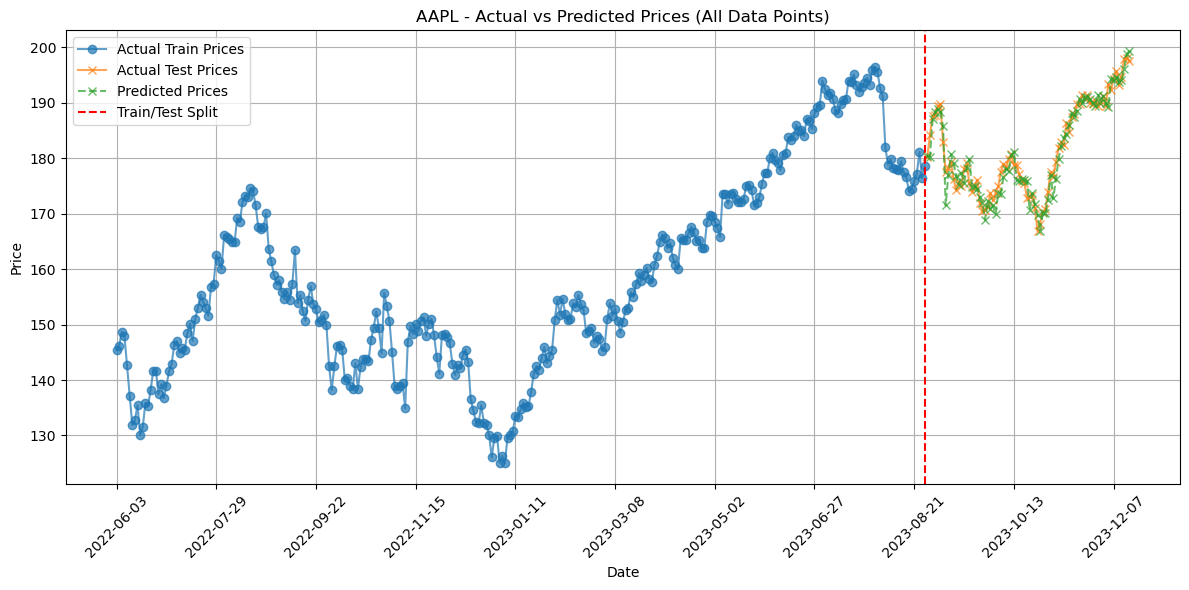

In [62]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Split the data into training and testing sets (80/20 split)
def split_time_series_data(df, train_size=0.8):
    train_index = int(len(df) * train_size)
    train = df[:train_index]
    test = df[train_index:]
    return train, test

# Function to convert returns back to prices
def returns_to_prices(open_prices, returns):
    # Calculate the close prices based on returns and open prices
    return open_prices * (1 + returns)

# SARIMAX Experiment: Using open, volume, and weighted_sentiment_score to predict return
def sarimax_experiment(df, p, d, q):
    train, test = split_time_series_data(df)  # Split data
    
    # Prepare training and test sets
    X_train = train[['open', 'volume', 'weighted_sentiment_score']]
    y_train = train['return']
    X_test = test[['open', 'volume', 'weighted_sentiment_score']]
    y_test = test['return']
    
    # Train SARIMAX model
    model = SARIMAX(y_train, exog=X_train, order=(p, d, q))
    results = model.fit(disp=False, method='powell')
    
    # Make predictions
    predictions = results.predict(start=len(train), end=len(train) + len(test) - 1, exog=X_test)
    
    return train['Date'], train['open'], test['Date'], test['open'], y_train, y_test, predictions

# Function to evaluate SARIMAX models using given best parameters for each stock
def evaluate_with_best_params_and_plot_prices(data, best_params):
    for stock_symbol, df in data.items():
        if stock_symbol in best_params:
            p, d, q = best_params[stock_symbol]
            print(f"Evaluating {stock_symbol} with Best Params: (p={p}, d={d}, q={q})")
            
            date_train, open_train, date_test, open_test, y_train, y_test, predictions = sarimax_experiment(df, p, d, q)
            
            # Convert returns to prices using open prices
            train_prices = returns_to_prices(open_train, y_train)
            test_prices = returns_to_prices(open_test, y_test)
            predicted_prices = returns_to_prices(open_test, predictions)
            
            # Plot the full price series (train + test)
            plt.figure(figsize=(12, 6))
            plt.plot(date_train, train_prices, label='Actual Train Prices', marker='o', alpha=0.7)
            plt.plot(date_test, test_prices, label='Actual Test Prices', marker='x', alpha=0.7)
            plt.plot(date_test, predicted_prices, label='Predicted Prices', marker='x', linestyle='--', alpha=0.7)
            plt.axvline(x=date_train.iloc[-1], color='r', linestyle='--', label='Train/Test Split')
            plt.title(f"{stock_symbol} - Actual vs Predicted Prices (All Data Points)")
            plt.xlabel("Date")
            plt.ylabel("Price")
            plt.legend()
            plt.grid()

            # Set x-ticks to only 10 values (evenly spaced across both train and test)
            num_ticks = 10
            combined_dates = pd.concat([date_train, date_test])  # Combine train and test dates for proper x-tick positioning
            tick_indices = range(0, len(combined_dates), len(combined_dates) // num_ticks)  # Get 10 evenly spaced indices
            tick_dates = combined_dates.iloc[tick_indices]  # Get corresponding dates for the ticks
            
            plt.xticks(tick_dates, rotation=45)

            plt.tight_layout()  # Adjust layout to prevent overlap
            plt.show()

# Example of best parameters dictionary
best_params = {
    'BA': (3, 2, 4),
    'MRK': (1, 0, 2),
    'INTC': (1, 1, 2),
    'MSFT': (2, 0, 2),
    'AMD': (3, 2, 5),
    'NVDA': (5, 2, 4),
    'TSLA': (5, 0, 4),
    'GOOG': (5, 1, 5),
    'AAPL': (6, 0, 6)
}

# Example data (replace `data` with actual dictionary of DataFrames)
# Each DataFrame should have a 'date', 'return', 'open', and 'volume' column
# data = {
#     'AAPL': df1,
#     'GOOG': df2,
#     ...
# }

# Run the evaluation with the best parameters and plot results
evaluate_with_best_params_and_plot_prices(data, best_params)
